# Research laboratory new compound experiment

## Problem Statement:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

## Data Description:

The data consists of 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv


## Domain:
Healthcare

## Context:
A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments.

## Attribute Information:

- A	: Ingredient A in compound
- B : Ingredient B in compound
- Volunteer : Volunteer no (1 to 4)
- Relief : Hours of reilef



## Import all the necessary libraries

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from scipy.stats import variation # for variation
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd # for tukeyhsd
from statsmodels.stats.multicomp import MultiComparison # for tukeyhsd

## Read the data into the notebook


In [25]:
df1= pd.read_csv('Fever-1.csv')

In [26]:
df1.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


## Exploratory Data Analysis 
 ## Checking the data types /information


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


The data set contains 36 observations of data and 4 variables. Column A , B and Volunteer seems to be a discrete numeric variable while Relief is a continous numeric variable. Since non null count is same in every column variable and is equal to total rows, hence there is no null data in any of these columns

Also A, B and Volunteer here looks like categorical variables where value of each column denote some category

## Checking for missing values

In [28]:
# Check for missing value in any colum
df1.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

We can confirm that there is no NULL value

## Checking the shape (Number of rows and columns)

In [29]:
df1.shape

(36, 4)

## Checking the value counts 

In [30]:
df1.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

There are 12 rows each for 3 different ingredient values of A (1,2,3)

In [31]:
df1.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

There are 12 rows each for 3 different ingredient values of B (1,2,3)

In [32]:
df1.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

There are 9 rows each for 4 different Volunteers (1,2,3,4)

## Checking for duplicates

In [33]:
# Check for duplicate data

dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


,A,B,Volunteer,Relief


No duplicates are present in the data

## Checking for summary

In [34]:
df1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.00,0.83,1.0,1.00,2.0,3.00,3.0
B,36.0,2.00,0.83,1.0,1.00,2.0,3.00,3.0
Volunteer,36.0,2.50,1.13,1.0,1.75,2.5,3.25,4.0
Relief,36.0,7.18,3.27,2.3,4.68,6.0,9.33,13.5


Ignoring A, B and Volunteer which are categorical in nature , we can see that :-

- mean and median value of Relief variable is same. 
- 25% and 75% percentile value of Relief variable appears to be symmetric (difference of 0.75 each side)
- Distribution of Relief variable looks normal

## Check for Outliers (Which all variables have an outlier?)

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


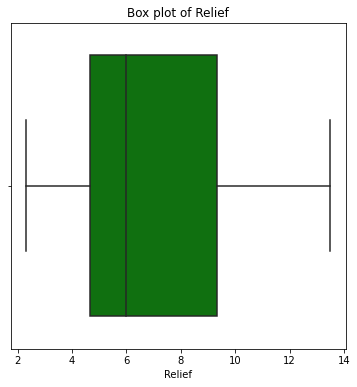

In [35]:
# Checking for Outliers
plt.figure(figsize= (6,6))
sns.boxplot(x='Relief',data =df1 ,color='green', orient = 'v').set(title ='Box plot of Relief');


As evident from above box plot, there is no outlier present.

## Plot the Histograms

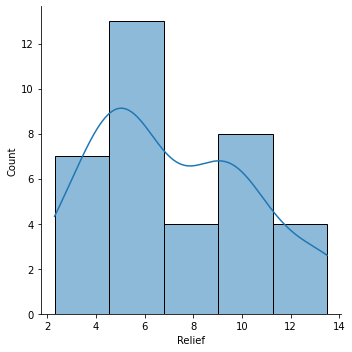

In [47]:
#Plots to see the distribution of the continuous features individually
sns.displot (df1.Relief,bins =5,kde=True)


These histograms doesnt looks like Normal with a slight blip in the middle section. It will be confirmed further using Shapiro's Wilk Test.

## Converting to category variable

In [48]:
# Converting into Category variable
df1["A"]= pd.Categorical(df1['A'])
df1["B"]= pd.Categorical(df1['B'])
df1["Volunteer"]= pd.Categorical(df1['Volunteer'])

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     category
 3   Relief     36 non-null     float64 
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


Now we can see that A, B and Volunteer are categorical variables

# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

## Formulate the Null and Alternate Hypothesis for Variable 'A'



**Null Hypothesis : The mean relief in hours is same for all three levels (1,2,3) of active ingredient A.**

**$H_0$ :$\mu_1$ =$\mu_2$=$\mu_3$**  

             
   where $\mu$ is the sample mean and 1,2,3 are the levels for ingredient A



**Alternate Hypothesis $H_A$ : The mean relief in hours is different for at-least one level (1,2 and 3) of active ingrdient A**

**$H_A$ : Not All $\mu_j$  are equal**

where $\mu_j$  is the sample mean for jth level for ingredient A. j can be 1,2 or 3



## Formulate the Null and Alternate Hypothesis for Variable 'B'

**Null Hypothesis : The mean relief in hours is same for all three levels (1,2,3) of active ingredient B.**

**$H_0$ :$\mu_1$ =$\mu_2$=$\mu_3$**   

where $\mu$ is the sample mean and 1,2,3 are the levels for ingredient B


**Alternate Hypothesis $H_A$ : The mean relief in hours is different for at-least one level (1,2 and 3) of active ingrdient B**

**$H_A$ : Not All $\mu_j$  are equal** 

where $\mu_j$  is the sample mean for jth level for ingredient B. j can be 1,2 or 3



# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

# Plotting histogram and boxplot for different level of ingredient A

In [55]:
#creating different dataframe for different levels of A
A1 = df1[df1.A == 1]
A2 = df1[df1.A == 2]
A3 = df1[df1.A == 3]


In [56]:
A1=A1.reset_index()
A1.rename(columns ={'Relief':'A1'}, inplace =True)
A2=A2.reset_index()
A2.rename(columns ={'Relief':'A2'}, inplace =True)
A3=A3.reset_index()
A3.rename(columns ={'Relief':'A3'}, inplace =True)


In [57]:
A= pd.concat ([A1['A1'], A2['A2'], A3['A3']], axis=1, sort=False)
A

,A1,A2,A3
0,2.4,5.8,6.1
1,2.7,5.2,5.7
2,2.3,5.5,5.9
3,2.5,5.3,6.2
4,4.6,8.9,9.9
5,4.2,9.1,10.5
6,4.9,8.7,10.6
7,4.7,9.0,10.1
8,4.8,9.1,13.5
9,4.5,9.3,13.0


In [58]:
A.describe()

,A1,A2,A3
count,12.000000,12.000000,12.000000
mean,3.883333,7.833333,9.833333
std,1.059016,1.777298,3.127977
min,2.300000,5.200000,5.700000
25%,2.650000,5.725000,6.175000
50%,4.450000,8.800000,10.300000
75%,4.625000,9.100000,13.050000
max,4.900000,9.400000,13.500000


From above statistics , it appears that ingredient A level 3 has the highest mean relief, followed by level 2 and then level 1

In [60]:
A2.A2

0     5.8
1     5.2
2     5.5
3     5.3
4     8.9
5     9.1
6     8.7
7     9.0
8     9.1
9     9.3
10    8.7
11    9.4
Name: A2, dtype: float64

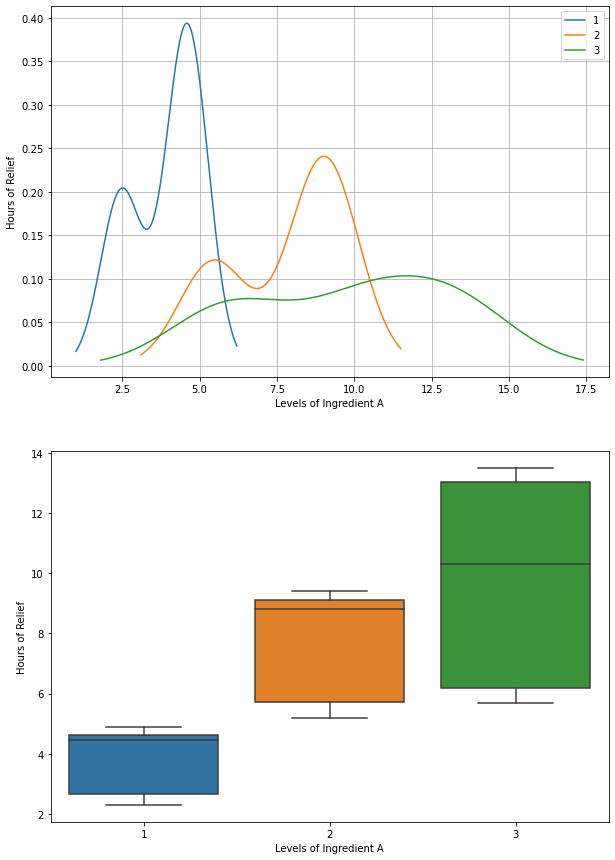

In [62]:
plt.figure(figsize=(10,15))

plt.subplot(2,1,1)
A1.A1.plot(kind='kde',label='1')
A2.A2.plot(kind='kde',label='2')
A3.A3.plot(kind='kde',label='3')
plt.legend()
plt.xlabel("Levels of Ingredient A")
plt.ylabel("Hours of Relief")
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x="A", y="Relief", data=df1)
plt.xlabel("Levels of Ingredient A")
plt.ylabel("Hours of Relief")
plt.show()

From above graphs we can say that :-
- Data for level 1 & 2 looks highly skewed towards left side and doesnt looks Normal. 
- Hours of Relief appears to be more in level 3 as compared to 2 and 1

## Test for Normality -  Shapiro- Wilk Test



### Null Hypothesis : The given observation is normally distributed
### Alternative Hypothesis : The given observation is not normally distributed



In [64]:
## Post filtering we apply the shapiro- Wilk Test
t1,p1 = stats.shapiro(A1.A1)
t2,p2 = stats.shapiro(A2.A2)
t3,p3 = stats.shapiro(A3.A3)
print(p1,p2,p3)

0.004211828112602234 0.001616060733795166 0.03468279168009758


### p-value is lower than alpha =0.05, that means,  we go ahead with alternative hypothesis as the observations are not normally distributed

## Levene's Test
#### Computes homogeneity of variance across groups.

### Null Hypothesis: Ho -The variances in the given dataset is the same
### Alternative Hypothesis: Ha - The variances in the given dataset is different 



In [66]:
LT = stats.levene(A1.A1, A2.A2, A3.A3)
print(LT)

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)


#### Since p-value is less than 0.05, we shall proceed with Alternative hypothesis that the variances are different

## Assumptions of ANOVA?

#### 1. Independent Sample -  Sample should be selected randomly( Equally likely events).
#### There should not be any pattern in the selection of sample
#### 2. Normal Distribution - Distribution of each group should be normal
#### 3. Homogenous Group -  Variance between the group should be the same.

## Point 2 & 3 of ANOVA's assumption are not true in our case but as per requirement it is told to us that we have to assume the assumptions of ANOVA as true, we are proceeding with the one way Anova test statistics for comparison

# One Way Anova



In [67]:
formula = 'Relief ~ C(A)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)



            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


# Conclusion

**Since the p value is less than the significance level (0.05), we reject the null hupothesis and conclude that with 95% confidence that the mean relief in hours is different for at-least one level (1,2 and 3) of active ingredient A

## Tukey Honest Significant Difference

In [68]:
compare = MultiComparison(df1['Relief'], df1['A'])
result = compare.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------


From Tukey HSD test, we can say statstically with 95% confidence that mean relief is different for level 1 & 2 and level 1 & 3 of inredient A. However mean relief is same for ingredient Level 2 and 3

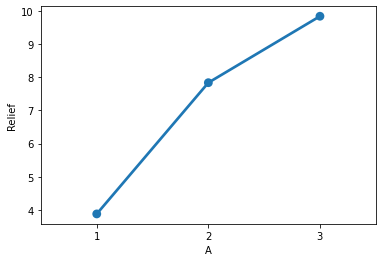

In [69]:
sns.pointplot(x ='A', y='Relief', data =df1, ci=None);

# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

# Plotting histogram and boxplot for different level of ingredient B

In [70]:
#creating different dataframe for different levels of B
B1 = df1[df1.B == 1]
B2 = df1[df1.B == 2]
B3 = df1[df1.B == 3]


In [71]:
B1=B1.reset_index()
B1.rename(columns ={'Relief':'B1'}, inplace =True)
B2=B2.reset_index()
B2.rename(columns ={'Relief':'B2'}, inplace =True)
B3=B3.reset_index()
B3.rename(columns ={'Relief':'B3'}, inplace =True)


In [72]:
B= pd.concat ([B1['B1'], B2['B2'], B3['B3']], axis=1, sort=False)
B

,B1,B2,B3
0,2.4,4.6,4.8
1,2.7,4.2,4.5
2,2.3,4.9,4.4
3,2.5,4.7,4.6
4,5.8,8.9,9.1
5,5.2,9.1,9.3
6,5.5,8.7,8.7
7,5.3,9.0,9.4
8,6.1,9.9,13.5
9,5.7,10.5,13.0


In [73]:
B.describe()

,B1,B2,B3
count,12.000000,12.000000,12.000000
mean,4.633333,7.933333,8.983333
std,1.622195,2.540341,3.706710
min,2.300000,4.200000,4.400000
25%,2.650000,4.850000,4.750000
50%,5.400000,8.950000,9.200000
75%,5.825000,9.950000,13.050000
max,6.200000,10.600000,13.500000


From above statistics , it appears that ingredient B level 3 has the highest mean relief, followed by level 2 and then level 1

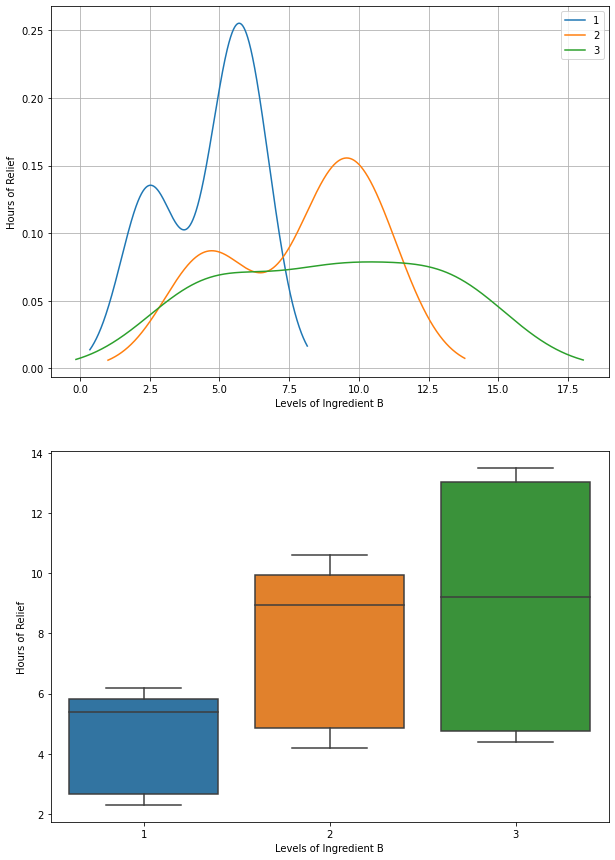

In [75]:
plt.figure(figsize=(10,15))

plt.subplot(2,1,1)
B1.B1.plot(kind='kde',label='1')
B2.B2.plot(kind='kde',label='2')
B3.B3.plot(kind='kde',label='3')
plt.legend()
plt.xlabel("Levels of Ingredient B")
plt.ylabel("Hours of Relief")
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x="B", y="Relief", data=df1)
plt.xlabel("Levels of Ingredient B")
plt.ylabel("Hours of Relief")
plt.show()

From above graphs we can say that :-
- Data for level 1 & 2 looks highly skewed towards left side and doesnt looks Normal. 
- Hours of Relief appears to be more in level 3 as compared to 2 and 1

## Test for Normality -  Shapiro- Wilk Test



### Null Hypothesis : The given observation is normally distributed
### Alternative Hypothesis : The given observation is not normally distributed



In [76]:
## Post filtering we apply the shapiro- Wilk Test
t1,p1 = stats.shapiro(B1.B1)
t2,p2 = stats.shapiro(B2.B2)
t3,p3 = stats.shapiro(B3.B3)
print(p1,p2,p3)

0.003910908009856939 0.01112875435501337 0.031581711024045944


### p-value is lower than alpha =0.05, that means,  we go ahead with alternative hypothesis as the observations are not normally distributed

## Levene's Test
#### Computes homogeneity of variance across groups.

### Null Hypothesis: Ho -The variances in the given dataset is the same
### Alternative Hypothesis: Ha - The variances in the given dataset is different 



In [77]:
LT = stats.levene(B1.B1, B2.B2, B3.B3)
print(LT)

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)


#### Since p-value is less than 0.05, we shall proceed with Alternative hypothesis that the variances are different

## Assumptions of ANOVA?

#### 1. Independent Sample -  Sample should be selected randomly( Equally likely events).
#### There should not be any pattern in the selection of sample
#### 2. Normal Distribution - Distribution of each group should be normal
#### 3. Homogenous Group -  Variance between the group should be the same.

## Point 2 & 3 of ANOVA's assumption are not true in our case but as per requirement it is told to us that we have to assume the assumptions of ANOVA as true, we are proceeding with the one way Anova test statistics for comparison

# One Way Anova



In [78]:
formula = 'Relief ~ C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)



            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


# Conclusion

**Since the p value is less than the significance level (0.05), we reject the null hupothesis and conclude that with 95% confidence that the mean relief in hours is different for at-least one level (1,2 and 3) of active ingredient B**

## Tukey Honest Significant Difference

In [79]:
compare = MultiComparison(df1['Relief'], df1['B'])
result = compare.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------


From Tukey HSD test, we can say statstically with 95% confidence that mean relief is different for level 1 & 2 and level 1 & 3 of inredient B. However mean relief is same for ingredient B Level 2 and 3

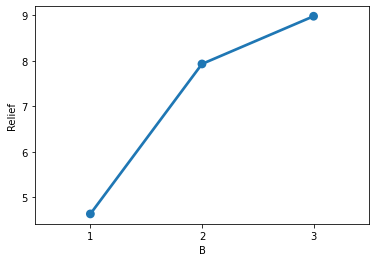

In [80]:
sns.pointplot(x ='B', y='Relief', data =df1, ci=None);

# 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

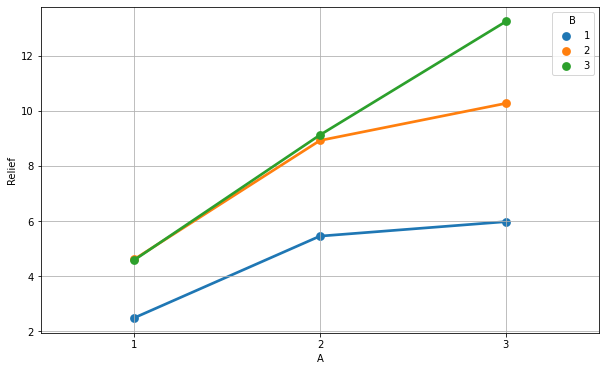

In [81]:
# plotting pointplot
plt.figure(figsize=(10,6))
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df1,ci=False)
plt.grid()
plt.show()

From point plot we can see that :- 
    - Mean relief in hours increases as the level of active ingredient A changes from 1 to 2 to 3. So it appears that 
      percentage level of Ingredient A increases with its Level
    - Mean relief in hours increases as the level of active ingredient B changes from 1 to 2 to 3. So it appears that 
      percentage level of Ingredient B increases with its Level
    - There is interaction between ingredient A & B
    - Mean Relief in hours is approximately the same for level 2 & 3 of ingredient B and level 1 & 2 of ingredient A
    - Rise in relief is significantly high if level 3 is used for both ingredient B and ingredient A
    - It appears that for ingredient B level 3 concentration level should be used for level 3 concentration of ingredient A, 
      otherwise we would not get substantial benefit in relief


# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

## Test for Normality -  Shapiro- Wilk Test



### Null Hypothesis : The given observation is normally distributed
### Alternative Hypothesis : The given observation is not normally distributed



In [82]:
## Post filtering we apply the shapiro- Wilk Test
t1,p1 = stats.shapiro(df1.Relief)
print(p1)

0.02178293839097023


### p-value is lower than alpha =0.05, that means,  we go ahead with alternative hypothesis as the observations are not normally distributed

### For 2 way ANOVA's assumption is there that dependent variable has to be approximately normal which is not true in our case. So more samples should be taken but as per requirement it is told to us that we have to assume the assumptions of ANOVA as true, we are proceeding with the two way Anova test statistics for comparison

In [83]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


### From the 2 way Anova test results we can see that p value is less than the significane level 0.05 for all the three factors (ingredient A, ingredient B, interaction of ingredient A with B). 

### So statistically with 95% confidence we can say that Mean Relief is affected by ingredient A, Ingredient B and interaction of ingredient A & B. 

### p value is least for A, so the most signifcant factor affecting Relief is ingredient A followed by ingredient B and then the interaction of both the ingredients

# 1.6) Mention the business implications of performing ANOVA for this particular case study.

From the Anova test results (one way and two way) and the visual representation graphs like histograms, box plots, point plot we can see following observations :-

- Independent Variable 'A' affect on Dependent variable Hours of 'Relief'
    - Ingredient A has 3 levels (1, 2 and 3). From summary of the sample data it can be seen that A ingredient level 3 has the highest mean relief of 9.8 as compared to level 2 (7.8) and level 1 (3.88)    
    - On comparing the mean relief of sample data across different levels of ingredient A  via 1 way Anova test, we found with 95% confidence level that mean relief for all levels is not equal i.e. for atleast one pair of level 1, 2 and 3 mean relief is different.        
    - Then on doing Tukey HSD test we have found that mean relief for 2 pair of ingredient A levels are not equal. i.e. Mean relief is same for level 2 & level 3 of ingredient A but its different for (level 1 & level 2) and (level 1 & level 3) of ingredient A.        
    - Further we have added the other independent variables like ingredient B and interaction of ingredient A & B in 2 way Anova Test. Then we have found that ingredient A is the most important attribute in deciding the value for dependent variable Relief.
    
    
    
- Independent Variable 'B' affect on Dependent variable Hours of 'Relief'

    - Ingredient B has 3 levels (1, 2 and 3). From summary of the sample data it can be seen that A ingredient level 3 has the highest mean relief of 9.98 as compared to level 2 (7.9) and level 1 (4.6)    
    - On comparing the mean relief of sample data across different levels of ingredient B  via 1 way Anova test, we found with 95% confidence level that mean relief for all levels is not equal i.e. for atleast one pair of level 1, 2 and 3 mean relief is different.    
    - Then on doing Tukey HSD test we have found that mean relief for 2 pair of ingredient A levels are not equal. i.e. Mean relief is same for level 2 & level 3 of ingredient B but its different for (level 1 & level 2) and (level 1 & level 3) of ingredient B.
    - Further we have added the other independent variables like ingredient A and interaction of ingredient A & B in 2 way Anova Test. Then we have found that ingredient B is the second most important in deciding the value for dependent variable Relief.

- Independent Variable 'A' and 'B' interaction affect on Dependent variable Hours of 'Relief'
    - In 2 way Anova test and point plot , it can be seen that interaction of ingredient A and ingredient B is also important in affecting the value of dependent variable Relief
    - Mean Relief in hours is approximately the same for level 2 & 3 of ingredient B and level 1 & 2 of ingredient A
    - Rise in relief is significantly high if level 3 is used for both ingredient B and ingredient A
    - It appears that for ingredient B level 3 concentration level should be used for level 3 concentration of ingredient A, 
      otherwise we would not get substantial benefit in relief    

Assumptions
    - As increasing the level from 1 to 2 and finally to 3, relief in hours is increased so we are assuming that Level 1 has the lowest concentration of ingredient A/B and Level 3 has the highest concentration. 
    - Level 1 concentration being in low concentration of ingredient A & B respectively, cost of compound will be lowest if level 1 is used for the treatment and similarly for level 3 it would be the highest.
    - Level 1 concentration being in low concentration of ingredient A & B respectively, side effects(if any) of ingredients will be at lowest levels if level 1 is used for the treatment and similarly for level 3 it would be the highest.

So our recommendation to the after going through these observations to the Business :-
- Ingredient A , Ingredient B and their interaction are important factors in deciding the average relief in hours.

- Treatment in which ingredient A and ingredient B are at the lowest level (Level 1) gives the least relief to the patients. So business should avoid this treatment to the patients

- Treatement in which concentration is changed from level 2 to level 3 for either ingredient A or B then correspondigly it should be changed to level 3 for other ingredient too. Otherwise we would not get sufficient inrease in relief. For example in treatment with A 2,  B 1 and in A 3 , B 1 mean relief is not increased significantly. Similarly relief is same for treatment B2,A1 and B3,A1. So in these treatments even if we are increasing the concentration of only one ingredient to highest level 3 and ignoring other ingredient then we are not getting substantial rise in relief. So this should be avoided by Business.

- Treatment in which ingredient A and ingredient B are at the highest level (Level 3) gives the most relief to the patients. So if costing works out for the company and there are no side effects of highest concentration levels of ingredients A & B, this treatment can be chosen by the Business for treatment